# Listado de todos los valores en un Bucket

El objetivo es recuperar todos los valores de un bucket

Sería algo así como:
    
```{sql}
select *
from bucket
```

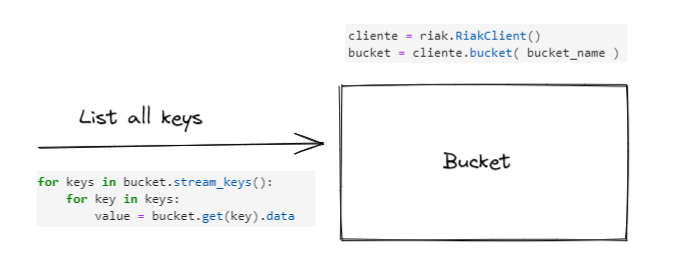

## Conexión a Riak

In [1]:
import riak

In [2]:
cliente = riak.RiakClient()
print("¿Está Riak disponible?", cliente.ping())

¿Está Riak disponible? True


In [3]:
!curl -s http://localhost:8098/stats  | jq .riak_kv_version

"2.1.7-0-gbd8e312"


## Listado de todos los valores

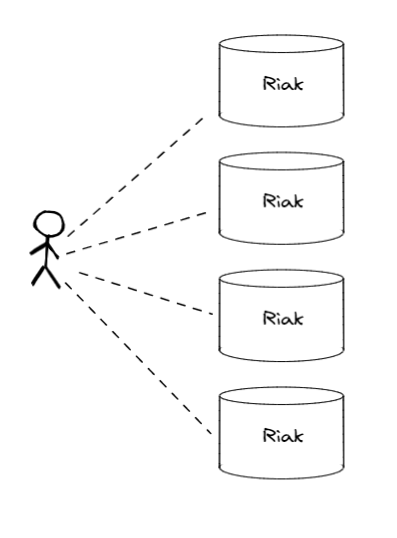

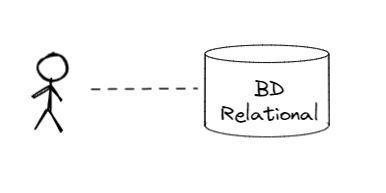

Riak devuelve un array con las claves. Nos corresponde a nosotros obtener el valor asociado a cada clave preguntando a la Base de datos


**Observa que la información recuperada no está ordenada!**

In [4]:
!curl --silent "http://localhost:8098/types/default/buckets/bucket_name/keys?keys=stream" | jq

{
  "keys": []
}
{
  "keys": []
}
{
  "keys": []
}
{
  "keys": []
}
{
  "keys": []
}
{
  "keys": [
    "key_two"
  ]
}
{
  "keys": []
}
{
  "keys": []
}
{
  "keys": []
}
{
  "keys": []
}
{
  "keys": []
}
{
  "keys": []
}
{
  "keys": []
}
{
  "keys": []
}
{
  "keys": []
}
{
  "keys": [
    "key_three"
  ]
}
{
  "keys": []
}
{
  "keys": []
}
{
  "keys": []
}
{
  "keys": []
}
{
  "keys": []
}
{
  "keys": [
    "contador"
  ]
}
{
  "keys": []
}


In [5]:
bucket = cliente.bucket("bucket_name")

In [6]:
# Se permiten operaciones de listado (No utilizar en PRODUCCION!)
riak.disable_list_exceptions = True

In [7]:
for keys in bucket.stream_keys():
    print("Keys: ", keys)
    for key in keys:
        value = bucket.get(key).data
        print('Key %s: %s' % (key, value))

Keys:  ['key_two']
Key key_two: Dos
Keys:  ['contador']
Key contador: 1
Keys:  ['key_three']
Key key_three: {'val1': 1, 'val2': 'Dos', 'val3': [1, 2, 3, 4, 5]}


In [8]:
riak.disable_list_exceptions = False